# HW 3
### Ye Zhou, 432569

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import time
from __future__ import division
% matplotlib inline

## Problem 1
Implement Newton's method on generated set of sample with labels {0, 1}.

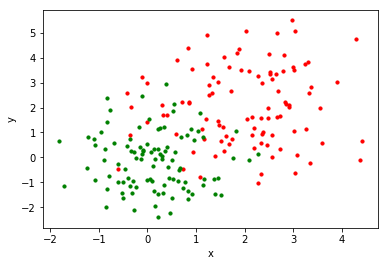

In [2]:
# Generate set of sample with labels {0, 1}
n0 = 100
n1 = 100
N = n0 + n1
mean_0 = [2,2]
cov_0 = [[1,0],[0,2]]
cat_0 = np.random.multivariate_normal(mean_0,cov_0, n0)
mean_1 = [0,0]
cov_1 = [[1,0],[0,1]]
cat_1 = np.random.multivariate_normal(mean_1,cov_1, n1)
plt.scatter(cat_0[:,0],cat_0[:,1],s=10,c='r')
plt.scatter(cat_1[:,0],cat_1[:,1],s=10,c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
# Create x and y dataset
x = np.vstack((cat_0, cat_1))
x = np.hstack((np.ones((N, 1)), x))
print('Shape of x is {}.'.format(x.shape))
y = np.vstack((np.zeros((n0, 1)), np.ones((n1, 1))))
print('Shape of y is {}.'.format(y.shape))

Shape of x is (200, 3).
Shape of y is (200, 1).


In [4]:
def sigmoid(W, x):
    # Sigmoid function
    return 1.0/(1 + np.exp(-x.dot(W)))

def loss_func(W, x, y, n):
    # Calculate the loss function and gradient 
    y_hat = sigmoid(W, x)
    loss = -(y.T.dot(np.log(y_hat)) + (1-y).T.dot(np.log(1-y_hat)))/n
    grad = -x.T.dot(y-y_hat)/n
    return loss, grad

def grad_descent(W, x, y, n):
    # Gradient descent
    loss_tot = []
    for i in range(200):
        loss, grad = loss_func(W, x, y, n)
        W = W - 0.1*grad
        loss_tot.append(loss[0])
    return W, loss_tot

def plot_res(W, loss):
    # Plot the loss function during relaxation
    # Plot the decision boundary calculated by logistic regression
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(loss)
    plt.xlabel('Iterations')
    plt.ylabel('Loss function')
    plt.subplot(1, 2, 2)
    lx = np.linspace(-2, 5, 10)
    ly = - lx * W[1]/W[2] - W[0]/W[2]
    plt.plot(lx, ly)
    plt.scatter(cat_0[:,0],cat_0[:,1],s=10,c='r')
    plt.scatter(cat_1[:,0],cat_1[:,1],s=10,c='g')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def metrics(W, x, y):
    # Calculate the accuracy and confusion matrix
    y_hat = sigmoid(W, x) > 0.5
    accuracy = np.round(np.mean(y_hat == y), 4)
    print('Accuracy is {}.'.format(accuracy))
    conf_m = np.zeros((2,2))
    conf_m[0][0] = np.sum((y_hat + y) == 0)
    conf_m[1][1] = np.sum((y_hat + y) == 2)
    conf_m[0][1] = np.sum((y_hat - y) == 1)
    conf_m[1][0] = np.sum((y_hat - y) == -1)
    print('Confusion matrix:')
    print(conf_m)

Accuracy is 0.88.
Confusion matrix:
[[ 94.   6.]
 [ 18.  82.]]


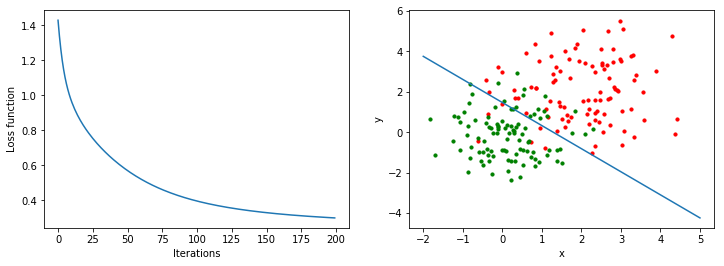

In [5]:
# Gradient descent
W_0 = np.random.standard_normal((3,1))
W, loss = grad_descent(W_0, x, y, N)
metrics(W, x, y)
plot_res(W, loss)

In [6]:
def newton_method(W, x, y, N):
    # Newton's method
    t_0 = time.time()
    loss_tot = []
    for i in range(200):
        y_hat = sigmoid(W, x)
        weight = y_hat * (1 - y_hat)
        weight = np.diag(np.hstack(weight))
#         hess = np.diag(np.diag(x.T.dot(weight.dot(x)) / N))
        hess = x.T.dot(weight.dot(x)) / N
        hess_inv = np.linalg.inv(hess)
        loss, first_grad = loss_func(W, x, y, N)
        grad = hess_inv.dot(first_grad)
        W = W - 0.1*grad
        loss_tot.append(loss[0])
    t_1 = time.time()
    print('Time: ',t_1 - t_0)
    return W, loss_tot

## Problem 2
Plot the data and the separator line from the result of Problem 1

('Time: ', 0.16048407554626465)
Accuracy is 0.885.
Confusion matrix:
[[ 89.  11.]
 [ 12.  88.]]


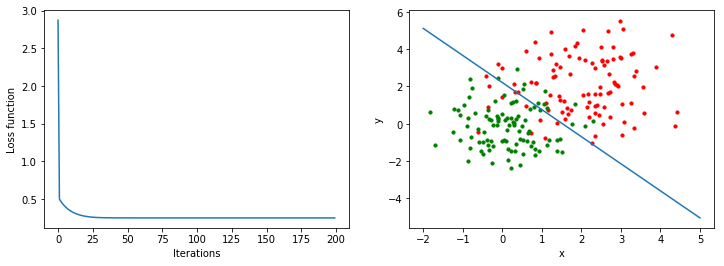

In [34]:
W_0 = np.random.standard_normal((3,1))
W, loss = newton_method(W_0, x, y, N)
metrics(W, x, y)
plot_res(W, loss)

## Problem 3
Use Stochastic Gradient Descent and compare the results

In [8]:
def loss_func_sgd(W, x, y, n):
    # Calculate the loss function
    y_hat = sigmoid(W, x)
    loss = -(y.T.dot(np.log(y_hat)) + (1-y).T.dot(np.log(1-y_hat)))/n
    return loss[0]

def grad_sgd(W, xi, yi):
    # Calculate the gradient on randomly selected sample
    y_hat = sigmoid(W, xi)
    grad = - (xi * (yi - y_hat)).reshape((3,1))
    return grad

def sgd(W, x, y, N):
    # Stochastic gradient descent
    loss_tot = []
    for i in range(200):
        random_idx = np.random.randint(N)
        xi = x[random_idx, :].reshape((1, 3))
        label = y[random_idx]
        loss = loss_func_sgd(W, x, y, N)
        grad = grad_sgd(W, xi, label)
        W = W - 0.1*grad
        loss_tot.append(loss)
    return W, loss_tot

Accuracy is 0.865.
Confusion matrix:
[[ 92.   8.]
 [ 19.  81.]]


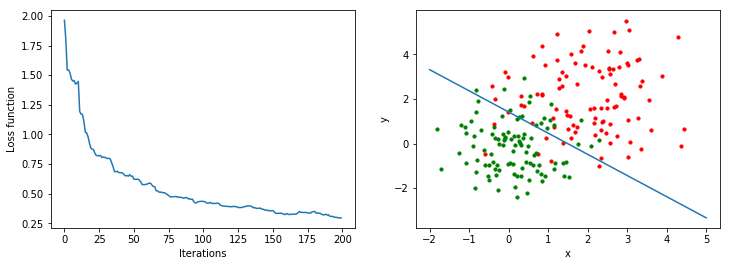

In [9]:
W_0 = np.random.standard_normal((3,1))
W, loss = sgd(W_0, x, y, N)
metrics(W, x, y)
plot_res(W, loss)

Three different methods (gradient descent, Newton's method, and stochastic gradient descent) are used to find the decision boundary. The accuracies of results from three methods, after 200 iteration steps, are very close. Comparing the loss function plot, we can tell that the Newton's method converges much faster than the other two methods. Moreover, the convergences of gradient descent and Newton's method are smooth and monotonic, while the loss function curve for stochastic gradient descent is rougher.

In [21]:
def loss_func_reg(W, x, y, n, l):
    # Add regularization term to loss function and gradient
    loss, grad = loss_func(W, x, y, n)
    loss += (l/2)*np.linalg.norm(W[1:])**2
    grad[1:] += l * W[1:]
    return loss, grad

def grad_descent_reg(W, x, y, n, l):
    # Regularized gradient descent 
    loss_tot = []
    t_0 = time.time()
    for i in range(200):
        loss, grad = loss_func_reg(W, x, y, n, l)
        W = W - 0.1*grad
        loss_tot.append(loss[0])
    t_1 = time.time()
    print('Time: ',t_1 - t_0)
    return W, loss_tot

('Time: ', 0.012125015258789062)
Accuracy is 0.89.
Confusion matrix:
[[ 87.  13.]
 [  9.  91.]]


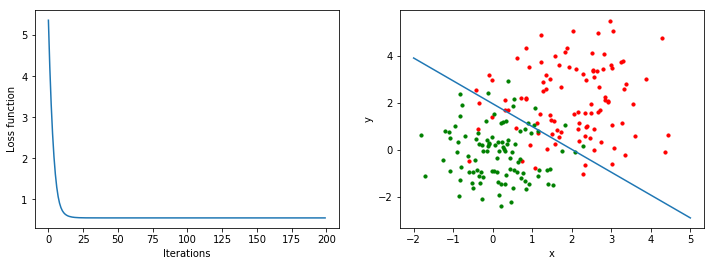

In [38]:
W, loss = grad_descent_reg(W_0, x, y, N, 1)
metrics(W, x, y)
plot_res(W, loss)